### Celltypist model training and cross-studty prediction

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import matplotlib as mpl
import harmonypy as hm 
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler
import celltypist
from celltypist import models

In [2]:
input_file = "/lustre/scratch117/cellgen/team205/rl20/kidney_final/final_object_upload/Myeloid.h5ad"
adata = sc.read_h5ad(input_file)

In [3]:
adata.X.expm1().sum(axis = 1)

matrix([[          inf],
        [          inf],
        [1.0466199e+22],
        ...,
        [2.6049825e+27],
        [          inf],
        [1.0148004e+33]], dtype=float32)

In [4]:
adata = adata[~adata.obs['annotation'].isin(['Low quality'])]

Trying to set attribute `.obs` of view, copying.


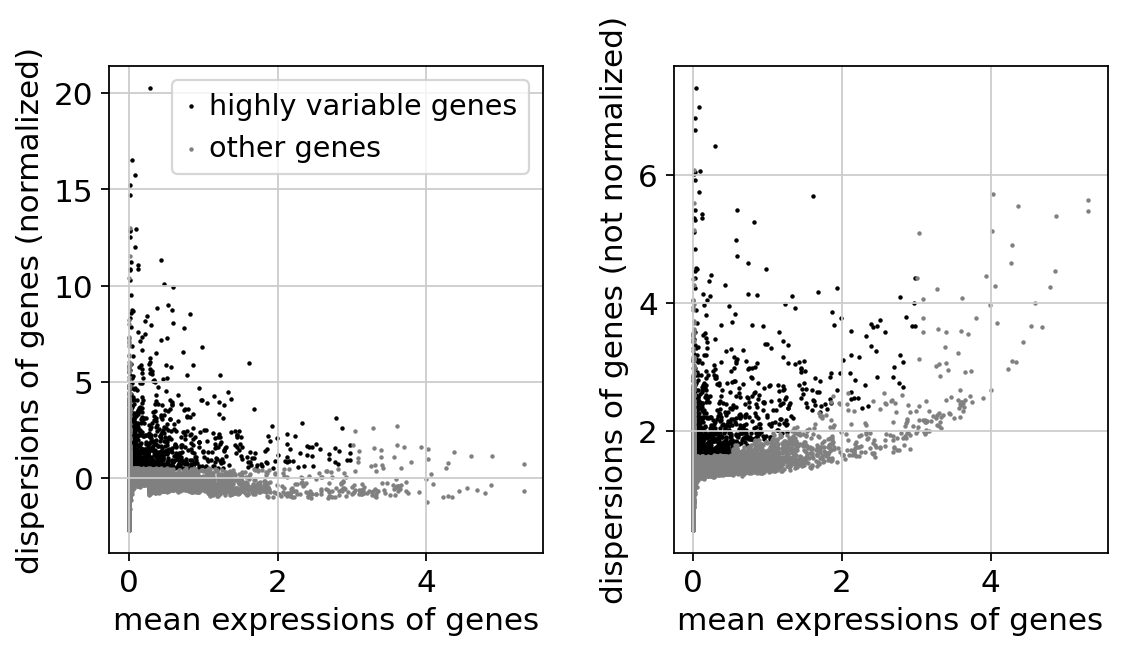

In [5]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pp.normalize_per_cell(adata, counts_per_cell_after = 1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [6]:
adata.obs

,patient,region,annotation,broad_celltype,n_counts
5739STDY7958790_AAACCTGGTCGACTGC-1,PD43948,Blood,Non-classical Mono,Myeloid,3079.0
5739STDY7958790_AAAGATGGTACCGTAT-1,PD43948,Blood,Classical Mono.2,Myeloid,3132.0
5739STDY7958790_AAAGCAAAGTACGACG-1,PD43948,Blood,Classical Mono.4,Myeloid,2525.0
5739STDY7958790_AAAGTAGAGCAGGCTA-1,PD43948,Blood,Classical Mono.4,Myeloid,3222.0
5739STDY7958790_AAATGCCCAAACTGCT-1,PD43948,Blood,Classical Mono.3,Myeloid,2934.0
...,...,...,...,...,...
5739STDY9266999_TTTGTCACAGGTCTCG-1,PD47512,Blood,Classical Mono.4,Myeloid,4872.0
5739STDY9266999_TTTGTCAGTGAGGCTA-1,PD47512,Blood,Classical Mono.2,Myeloid,4923.0
5739STDY9266999_TTTGTCAGTTATTCTC-1,PD47512,Blood,Classical Mono.4,Myeloid,4289.0
5739STDY9266999_TTTGTCATCCTATGTT-1,PD47512,Blood,Classical Mono.3,Myeloid,3738.0


In [7]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.149],
        [ 9999.962],
        [10000.005],
        ...,
        [10000.087],
        [ 9999.99 ],
        [10000.002]], dtype=float32)

In [285]:
#new_model = celltypist.train(adata[:, adata.var.DEGs], labels = 'annotation', check_expression = False, feature_selection = True)
new_model = celltypist.train(adata, labels = 'annotation', feature_selection = True)

🍳 Preparing data before training
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
🔎 Selecting features
🧬 845 features are selected
🏋️ Starting the second round of training
🏋️ Training data using logistic regression
✅ Model training done!


In [284]:
new_model.write('/lustre/scratch117/cellgen/team205/rl20/kidney_final/revision/celltypist_model/myeloid_feature_selection.pkl')

In [ ]:
### Self prediction

In [21]:
prediction_self = celltypist.annotate(adata, model = new_model, majority_voting = True)

🔬 Input data has 49906 cells and 19736 genes
🔗 Matching reference genes in the model
🧬 1942 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/numba/core/typed_passes.py:327: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning:

In [22]:
adata = prediction_self.to_adata()

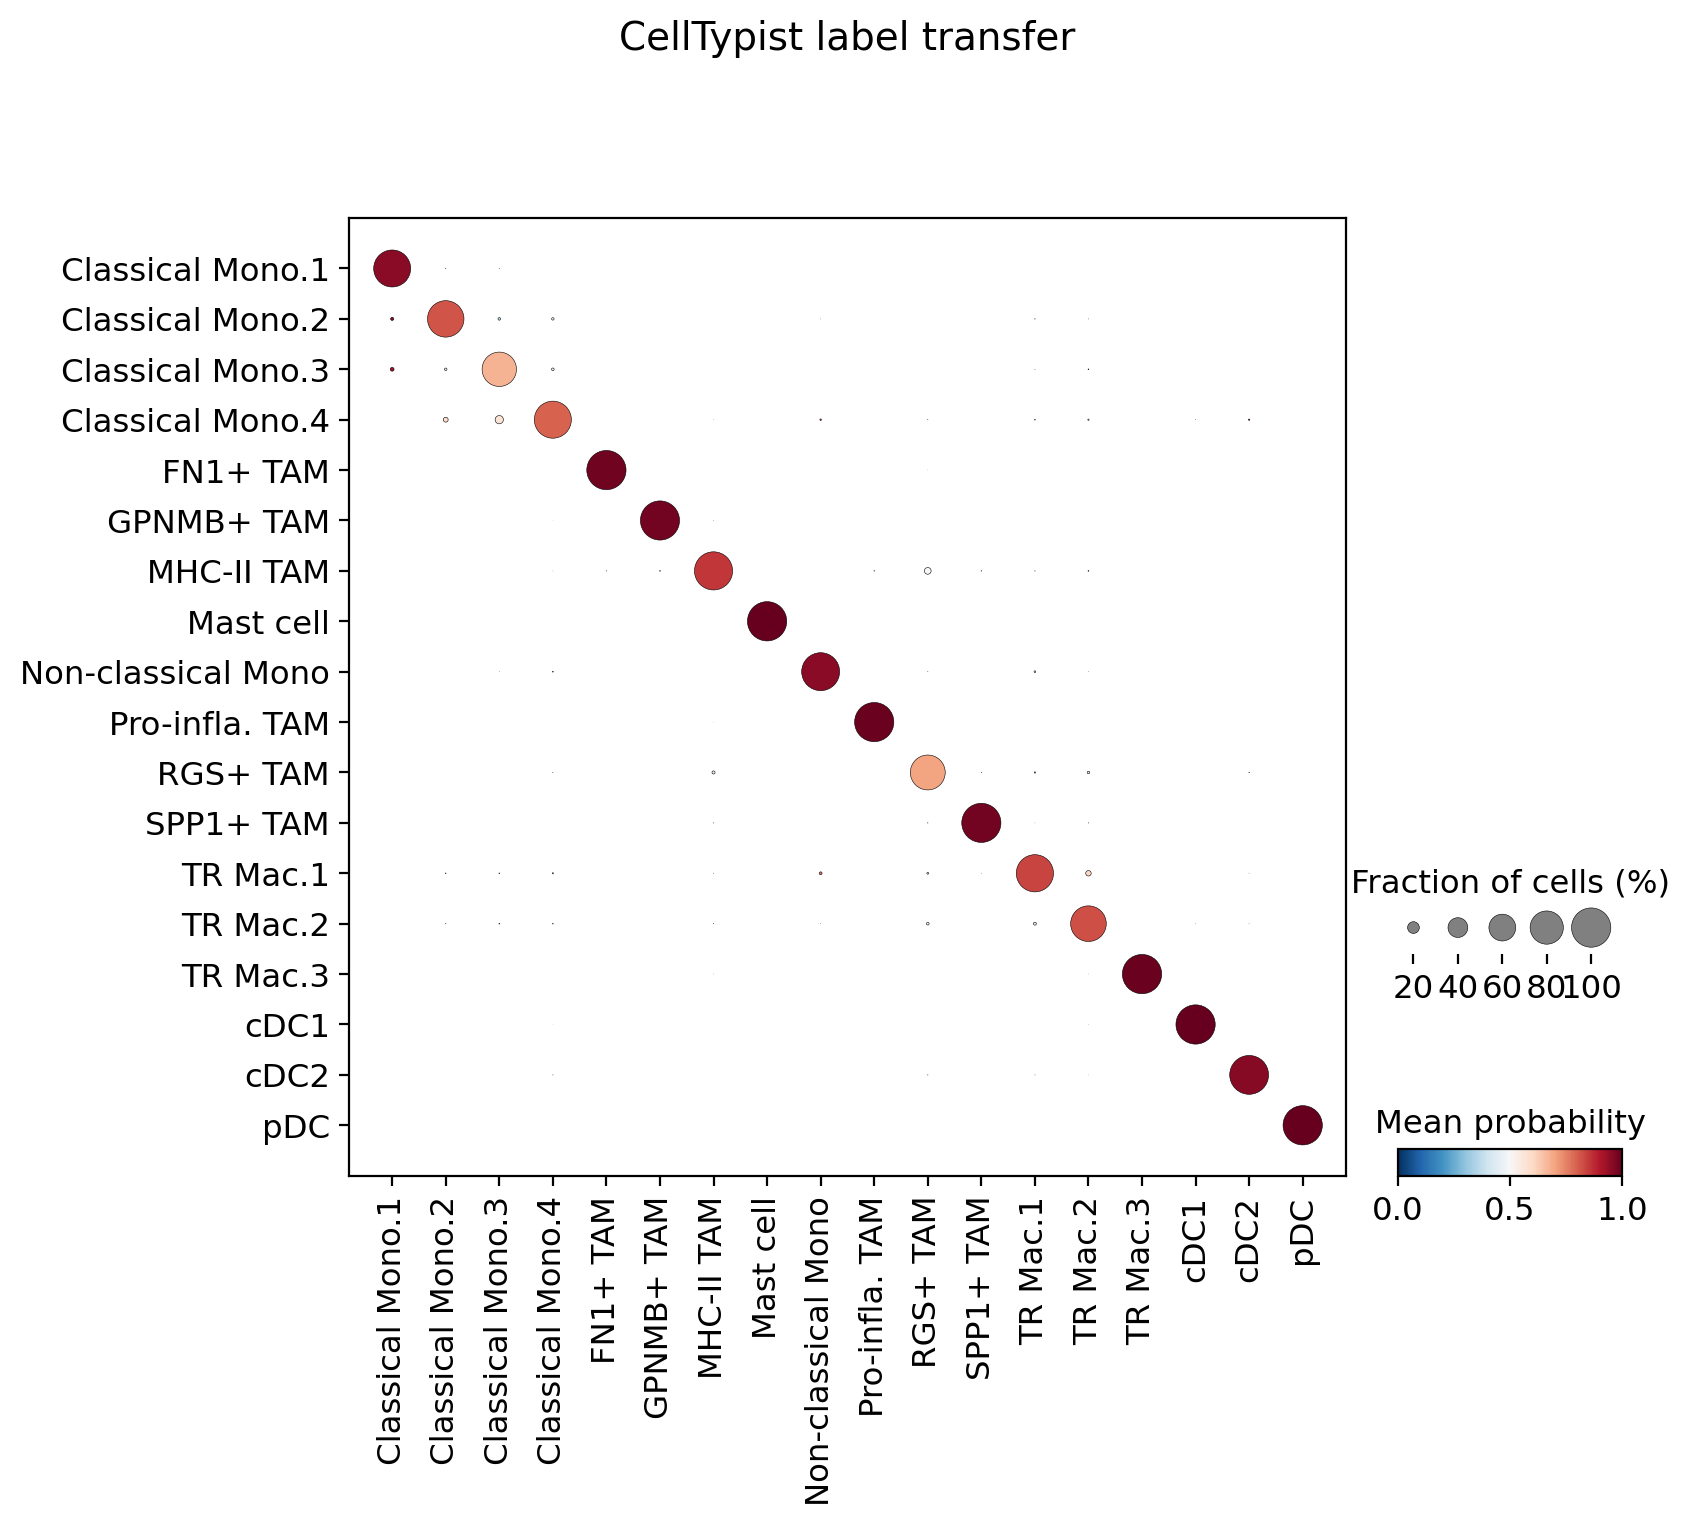

In [23]:
celltypist.dotplot(prediction_self, use_as_reference = 'annotation', use_as_prediction = 'predicted_labels')

### Prediction

In [8]:
new_model = models.Model.load('/lustre/scratch117/cellgen/team205/rl20/kidney_final/revision/celltypist_model/myeloid_feature_selection.pkl')

In [9]:
#input_file = "/lustre/scratch117/cellgen/team205/rl20/kidney_final/revision/dataset/ccRCC_Krishna_geneid.h5ad"
#input_file = "/lustre/scratch117/cellgen/team205/rl20/kidney_final/revision/dataset/ccRCC_Bi.h5ad"
#input_file = "/lustre/scratch117/cellgen/team205/rl20/kidney_final/revision/dataset/ccRCC_Wu.h5ad"
input_file = "/lustre/scratch117/cellgen/team205/rl20/kidney_final/revision/dataset/CommBio_APC_FullCluster.h5ad"
adata_pre = sc.read_h5ad(input_file)

In [10]:
adata_pre.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,integrated_snn_res.0.8,seurat_clusters,sample,type,Final_clusters,Minor,S.Score,G2M.Score,Phase,Run,percent.mt,newCluster,annot
P1_P_AAACCTGAGTTAGGTA,P1,7923.0,2365,8244.0,2359,17,17,P1,P,19,DC,-0.021717,-0.009156,G1,P1_P,2.751483,16,pDC
P1_P_AAACCTGCAAAGGTGC,P1,9706.0,2621,9077.0,2620,7,7,P1,P,5,Monocyte,-0.049534,-0.065308,G1,P1_P,4.718731,6,CD16pos Mono.2
P1_P_AAACCTGCAAATTGCC,P1,4076.0,1583,7173.0,1641,2,2,P1,P,0,Monocyte,-0.017485,-0.021547,G1,P1_P,7.360157,2,CD14pos Mono.1
P1_P_AAACCTGCAGATGAGC,P1,4351.0,1450,7392.0,1482,2,2,P1,P,0,Monocyte,-0.006080,-0.050144,G1,P1_P,5.010342,2,CD14pos Mono.1
P1_P_AAACCTGCAGTGGAGT,P1,3767.0,1452,7357.0,1530,4,4,P1,P,0,Monocyte,-0.009102,-0.023084,G1,P1_P,5.707460,4,CD14pos Mono.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N2_K_ATTGGTGCAATGGACG,N2,1998.0,888,4572.0,952,11,11,N2,K,0,Monocyte,-0.042282,0.027464,G2M,N2_K,9.459459,10,CD14pos Mono.4
N2_K_CAGTAACCAAGTTGTC,N2,1872.0,891,4340.0,1009,0,0,N2,K,5,Monocyte,-0.013456,0.015242,G2M,N2_K,3.525641,0,TAM_1
N2_K_CGTCACTCATGGTCTA,N2,9596.0,2225,5072.0,1909,11,11,N2,K,0,Monocyte,-0.026488,-0.004478,G1,N2_K,4.241351,10,CD14pos Mono.4
N2_K_CTACCCATCACGACTA,N2,5494.0,1691,5056.0,1670,6,6,N2,K,0,Monocyte,-0.049595,-0.004759,G1,N2_K,7.626502,5,CD14pos Mono.3


In [13]:
adata_pre.X.expm1().sum(axis = 1)

matrix([[10000.012 ],
        [ 9999.931 ],
        [10000.095 ],
        ...,
        [ 9999.852 ],
        [10000.0625],
        [ 9999.967 ]], dtype=float32)

In [14]:
predictions = celltypist.annotate(adata_pre, model = new_model)
#predictions = celltypist.annotate(adata_sub, model = new_model)

🔬 Input data has 10251 cells and 39145 genes
🔗 Matching reference genes in the model
🧬 1942 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [15]:
predictions.predicted_labels

,predicted_labels
P1_P_AAACCTGAGTTAGGTA,pDC
P1_P_AAACCTGCAAAGGTGC,Classical Mono.4
P1_P_AAACCTGCAAATTGCC,Classical Mono.4
P1_P_AAACCTGCAGATGAGC,Classical Mono.4
P1_P_AAACCTGCAGTGGAGT,Classical Mono.4
...,...
N2_K_ATTGGTGCAATGGACG,TR Mac.2
N2_K_CAGTAACCAAGTTGTC,TR Mac.3
N2_K_CGTCACTCATGGTCTA,TR Mac.2
N2_K_CTACCCATCACGACTA,TR Mac.2


In [16]:
#adata_sub = predictions.to_adata()
adata_pre = predictions.to_adata()

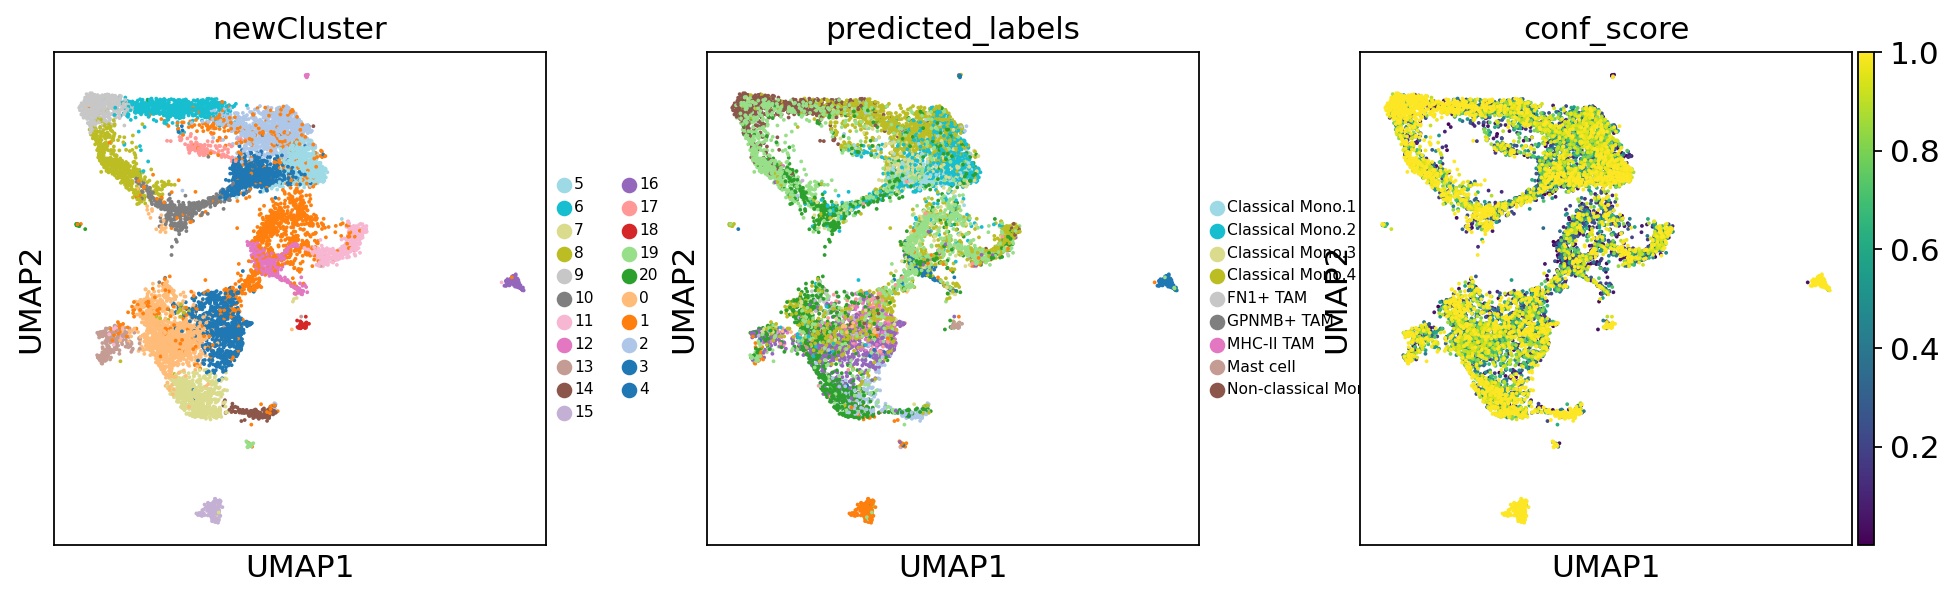

In [18]:
sc.pl.umap(adata_pre, color=['newCluster','predicted_labels','conf_score'], palette='tab20_r', legend_fontsize=7)

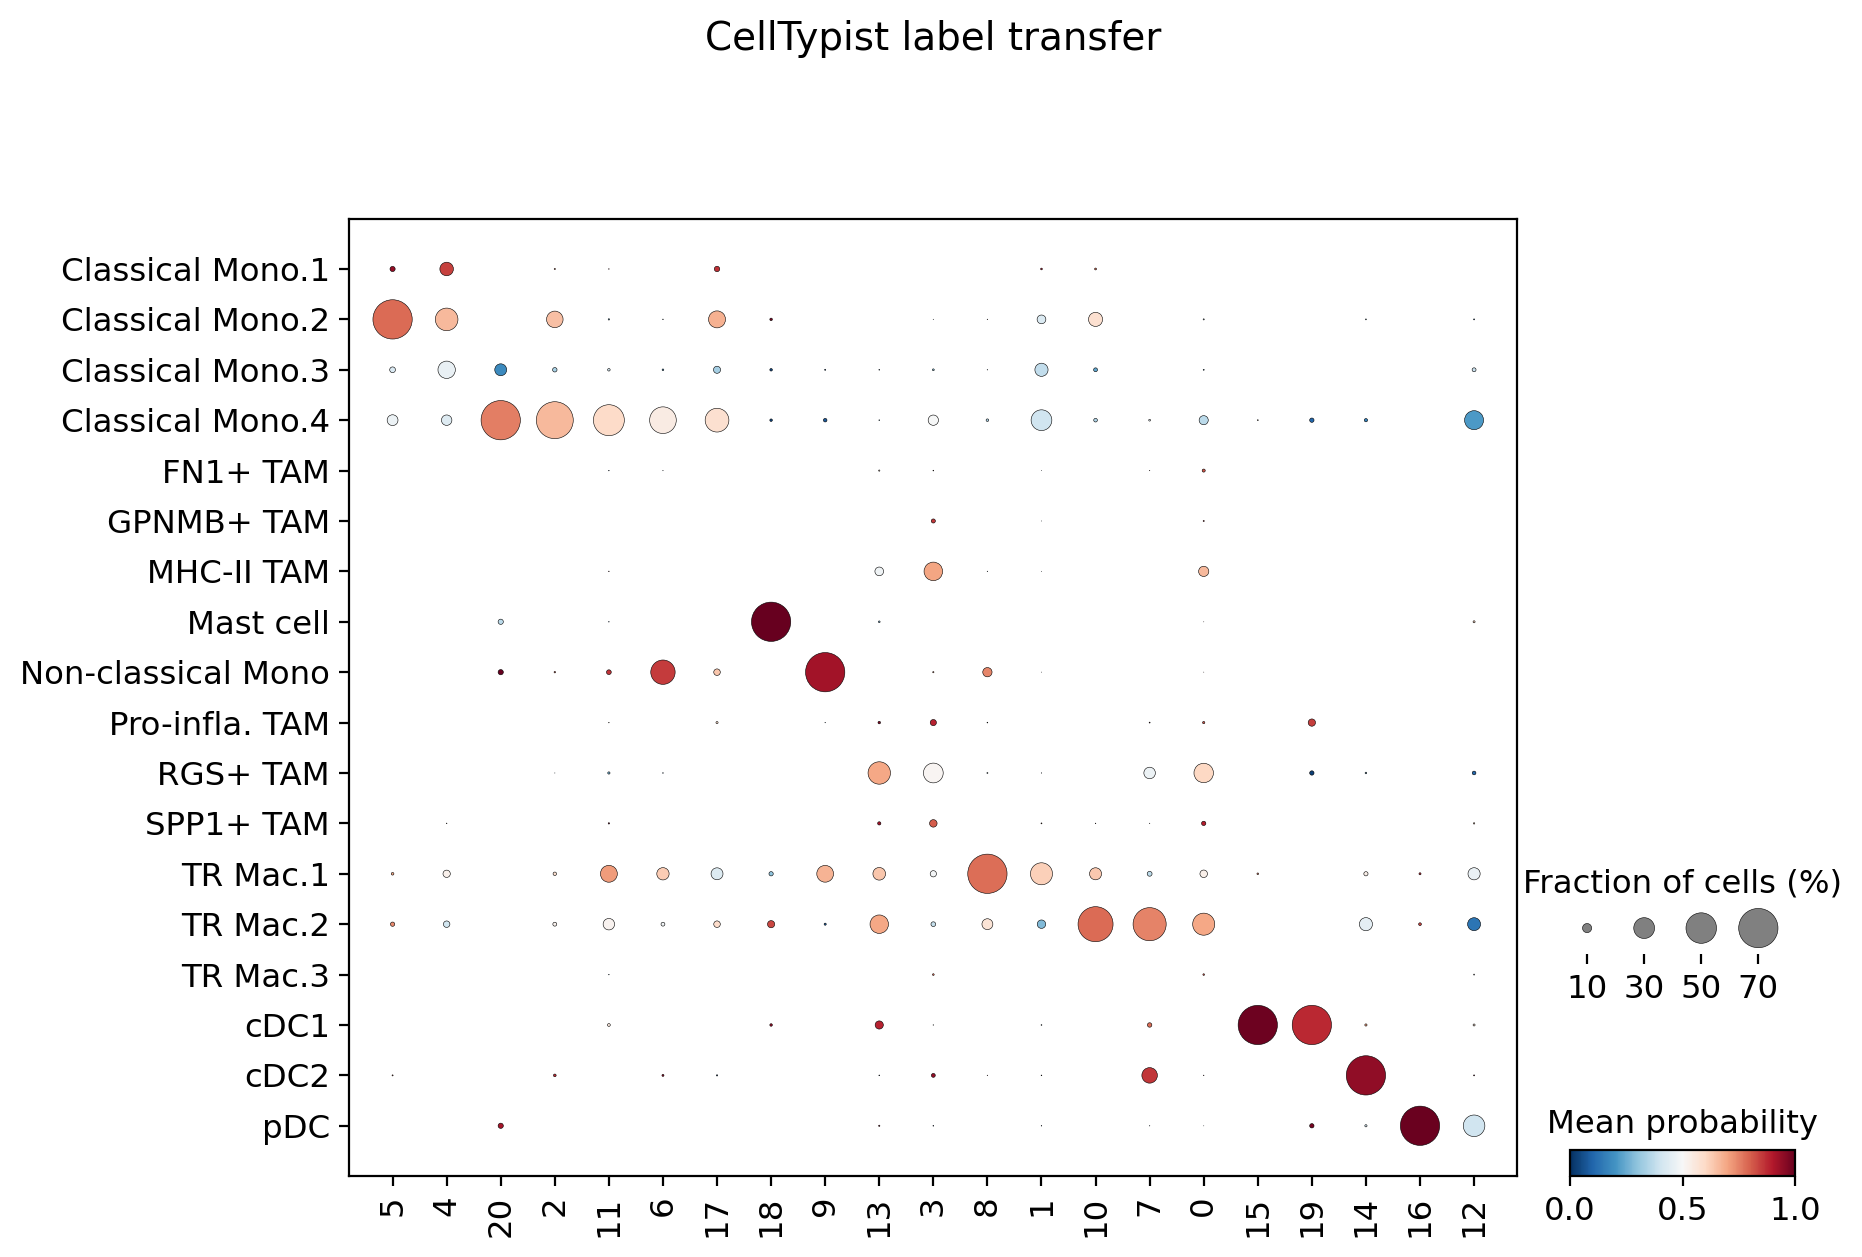

In [20]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
celltypist.dotplot(predictions, use_as_reference = 'newCluster', use_as_prediction = 'predicted_labels', dot_max=0.7)

### self predict